In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# understanding data

In [27]:
data = pd.read_csv("/content/gym_members_exercise_tracking.csv")

In [28]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [30]:
data["Workout_Type"].value_counts()

,count
Workout_Type,
Strength,258
Cardio,255
Yoga,239
HIIT,221


In [31]:
data["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [32]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [33]:
import matplotlib.pyplot as plt

import seaborn as sns

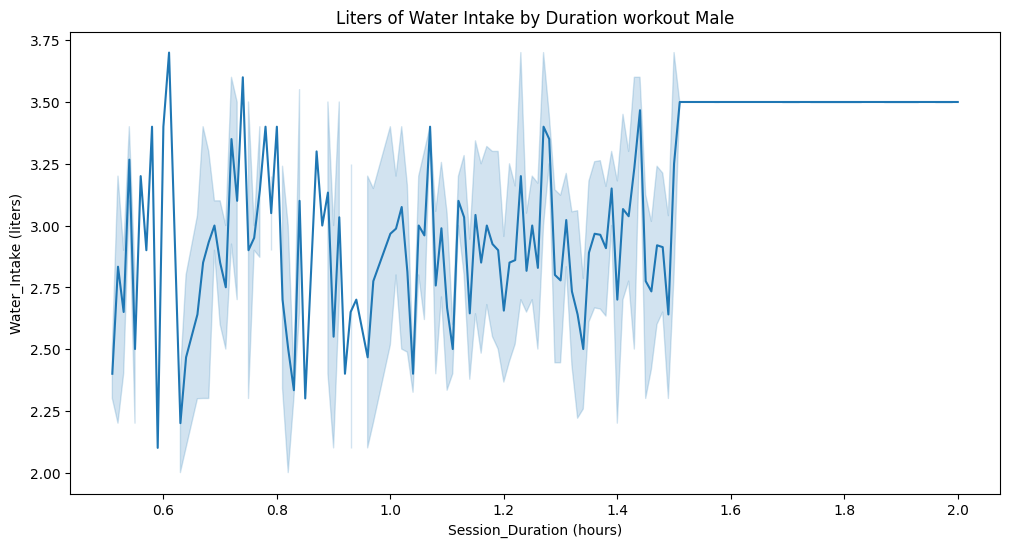

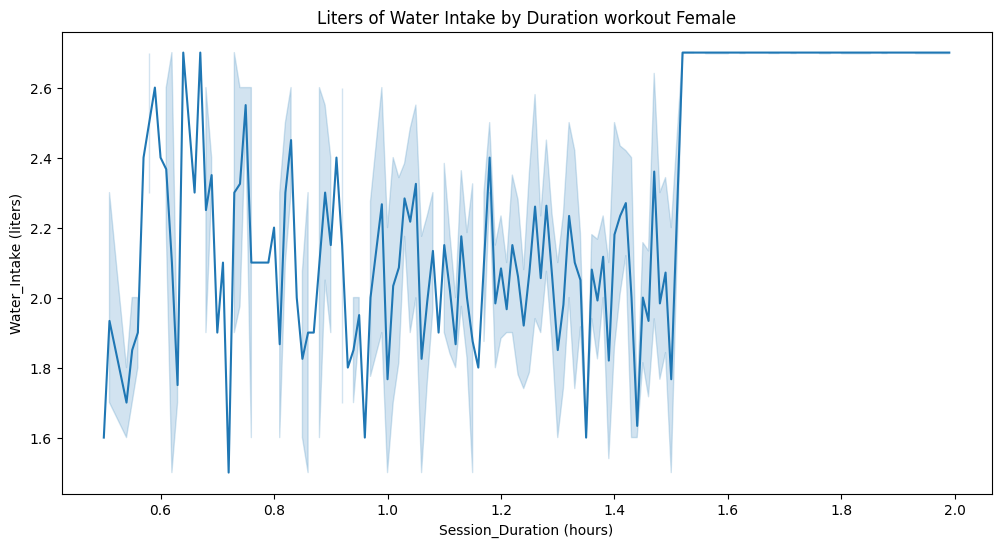

In [34]:
for value in data["Gender"].unique():
  plt.figure(figsize=(12,6))

  sns.lineplot(x='Session_Duration (hours)',y='Water_Intake (liters)',data=data[data["Gender"] == value])

  plt.title(f'Liters of Water Intake by Duration workout {value}')

  plt.show()

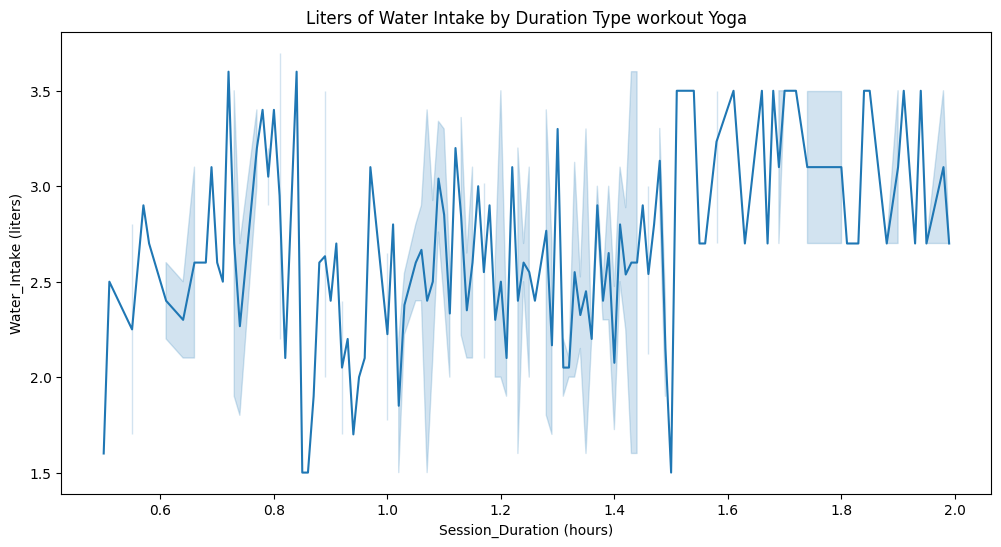

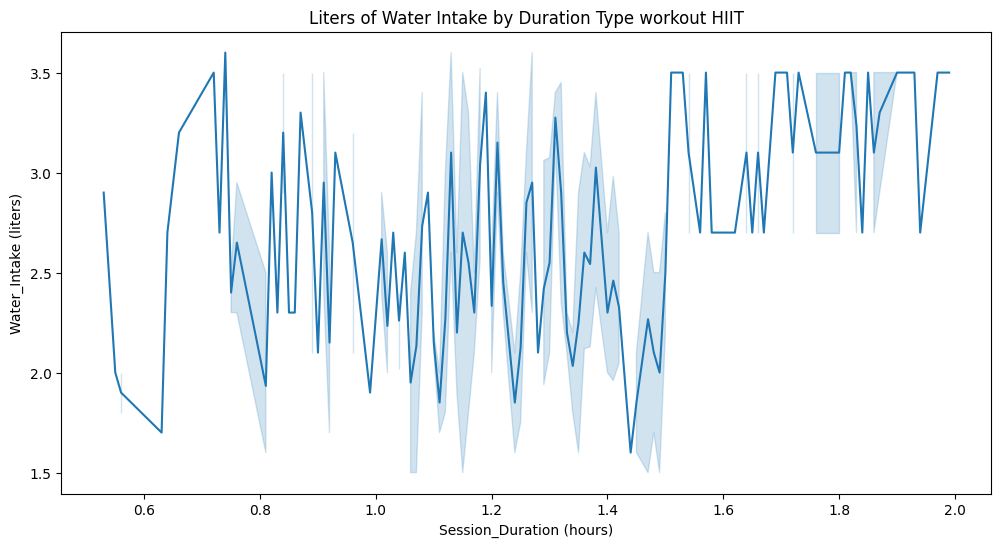

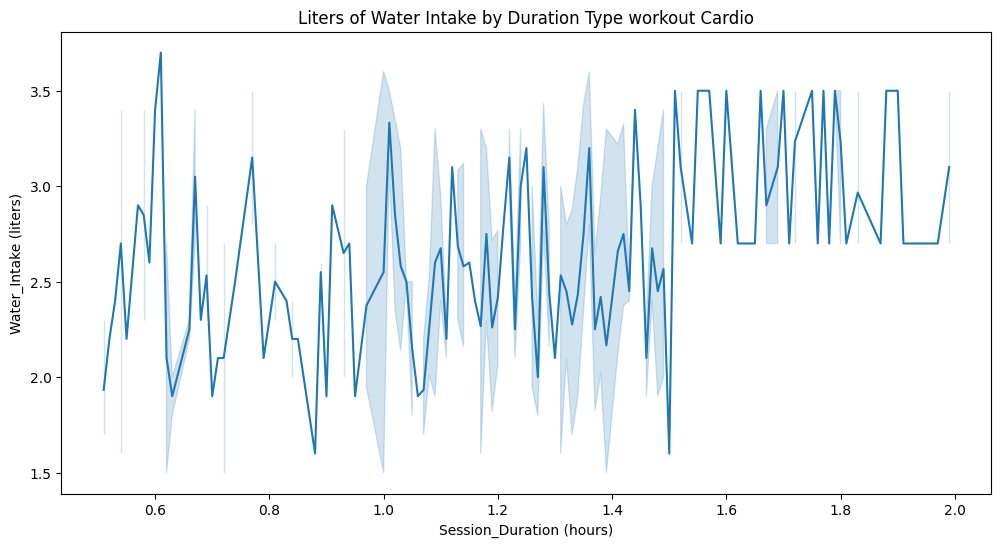

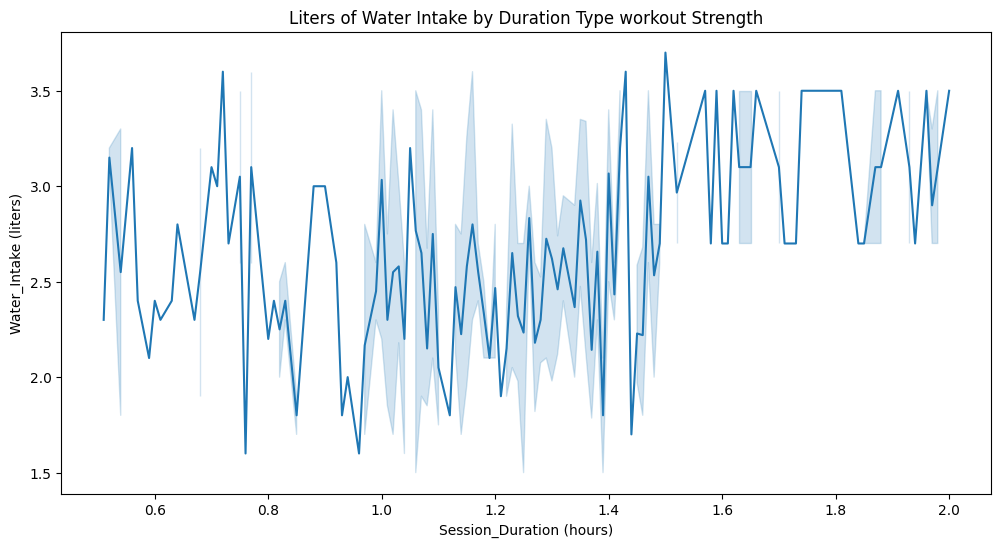

In [35]:
for value in data["Workout_Type"].unique():
  plt.figure(figsize=(12,6))

  sns.lineplot(x='Session_Duration (hours)',y='Water_Intake (liters)',data=data[data["Workout_Type"] == value])

  plt.title(f'Liters of Water Intake by Duration Type workout {value}')

  plt.show()

In [36]:
def one_encode_workout_type(workout):
  data = {
      "Yoga": "0" ,
      "HIIT" : "1" ,
      "Cardio": "2",
      "Strength":"3"
  }
  return data.get(workout)

def one_encode_gender(gender):
  data = {
      "Female": "0" ,
      "Male" : "1" ,

  }
  return data.get(gender)

In [37]:
data["Workout_Type"] = data["Workout_Type"].apply(one_encode_workout_type)
data["Gender"] = data["Gender"].apply(one_encode_gender)

In [38]:
# correlation_matrix = data.corr()

# plt.figure(figsize=(10, 8))

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# plt.title('Correlation Matrix', fontsize=16)

# plt.show()

In [39]:
data.info

<bound method DataFrame.info of      Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56      1         88.3        1.71      180      157           60   
1     46      0         74.9        1.53      179      151           66   
2     32      0         68.1        1.66      167      122           54   
3     25      1         53.2        1.70      190      164           56   
4     38      1         46.1        1.79      188      158           68   
..   ...    ...          ...         ...      ...      ...          ...   
968   24      1         87.1        1.74      187      158           67   
969   25      1         66.6        1.61      184      166           56   
970   59      0         60.4        1.76      194      120           53   
971   32      1        126.4        1.83      198      146           62   
972   46      1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0            0            12.6   
1                        1.30            883.0            1            33.9   
2                        1.11            677.0            2            33.4   
3                        0.59            532.0            3            28.8   
4                        0.64            556.0            3            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0            3            10.0   
969                      1.38           1260.0            3            25.0   
970                      1.72            929.0            2            18.8   
971                      1.10            883.0            1            28.2   
972                      0.75            542.0            3            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]>

In [40]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,0,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,2,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,3,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,3,29.2,2.8,3,1,14.39


In [41]:
data["Age"] = data["Age"].astype('object')
data["Experience_Level"] = data["Experience_Level"].astype('object')
data["Workout_Frequency (days/week)"] = data["Workout_Frequency (days/week)"].astype('object')

In [42]:
X = data.drop(columns = ["Calories_Burned"])
Y = data["Calories_Burned"]

In [43]:
data.describe()

,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
count,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,24.912127
std,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,6.660879
min,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,12.320000
25%,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,20.110000
50%,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,24.160000
75%,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,28.560000
max,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,49.840000


In [44]:
data.describe(include=['O'])

,Age,Gender,Workout_Type,Workout_Frequency (days/week),Experience_Level
count,973,973,973,973,973
unique,42,2,4,4,3
top,43,1,3,3,2
freq,34,511,258,368,406


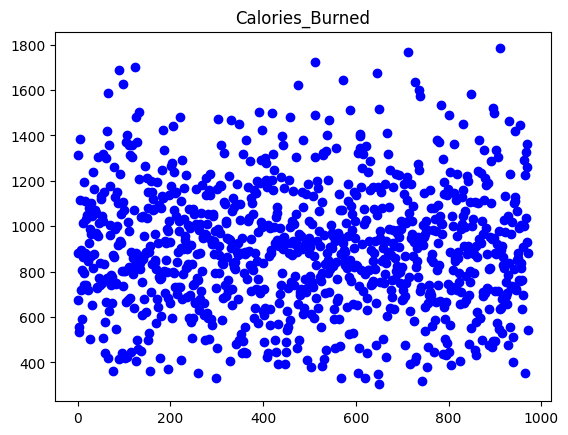

In [45]:
plt.scatter(range(len(Y)), Y, color='blue')
plt.title('Calories_Burned')
plt.show()

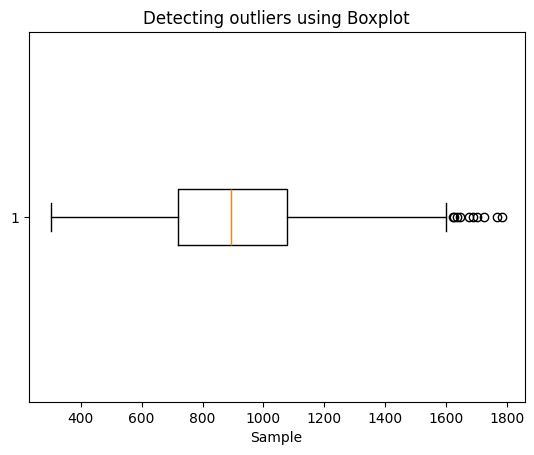

In [46]:
plt.boxplot(Y, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [47]:
def detect_outliers(data):
    # Menghitung mean dan standar deviasi data
    mean = np.mean(data)
    std_dev = np.std(data)

    # Menghitung Z-score untuk setiap data point
    z_scores = np.abs((data - mean) / std_dev)

    # Mendeteksi outlier berdasarkan rule Z-score
    outliers = np.where(z_scores > 3)[0]  # Indeks data yang merupakan outlier
    if len(outliers) > 0:
      return outliers
    else:
      return None

In [48]:
Y[detect_outliers(Y)]

,Calories_Burned
511,1725.0
712,1766.0
910,1783.0


Label are detected from outlier

In [49]:
feature_x = data[["Weight (kg)","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)"]]

In [50]:
for features in feature_x:
  if detect_outliers(data[features]):
    print(f"detected outlier: {detect_outliers(data[features])}")
  print(f"{features} -> not detected outlier")

Weight (kg) -> not detected outlier
Session_Duration (hours) -> not detected outlier
Fat_Percentage -> not detected outlier
Water_Intake (liters) -> not detected outlier


Treatment using method standarization


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = Y.to_frame('calories_burned')
y_scaler = scaler.fit_transform(Y)

Feature clear not detected from outlier

# feature selection ( without fat percentage) Still maintence error when input 6 redundant with feature fat percentage

In [52]:
data_without_fat_percentage = data.drop(columns=["Fat_Percentage"])
X_without_fat_percentage = X.drop(columns=["Fat_Percentage"])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


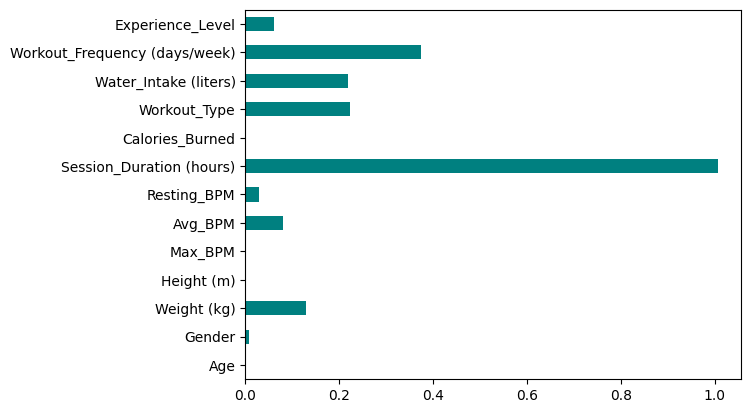

In [53]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_regression(X_without_fat_percentage, y_scaler)
feat_importances = pd.Series(importances, data_without_fat_percentage.columns[0:len(data_without_fat_percentage.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [54]:
feat_df= feat_importances.to_frame().reset_index()
feat_df=feat_df.rename(columns= {0: 'value','index':"feature"})
feat_df

,feature,value
0,Age,0.000000
1,Gender,0.007261
2,Weight (kg),0.130091
3,Height (m),0.000000
4,Max_BPM,0.002238
5,Avg_BPM,0.081186
6,Resting_BPM,0.028123
7,Session_Duration (hours),1.006497
8,Calories_Burned,0.000000
9,Workout_Type,0.223662


In [55]:
best_feature_col_without_fat_percentage = feat_df[feat_df["value"] >= 0.1]
best_feature_col_without_fat_percentage = best_feature_col_without_fat_percentage.feature

##model selection

In [56]:
X_without_fat_percentage = data[best_feature_col_without_fat_percentage ]
y = data['Calories_Burned']

##split test

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [64]:
def plot_graph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))

    plt.scatter(range(len(y_test)), y_test, color='blue',label='Data testing')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Prediction')
    plt.title(regressorName)
    plt.legend()
    plt.show()
    return
def best_model_estimators(data_feature,
                         data_label,
                         model,
                         test_split = 0.5,
                         train_split=0.5,
                         grid_name = None):

  for test_size in np.arange(start=0.1, stop=0.6, step=0.1):
      train_size = 1 - test_size  # Ensure train + test <= 1

      # Split data
      X_train, X_test, y_train, y_test = train_test_split(
          data_feature, data_label, test_size=test_size, train_size=train_size
      )



      # Fit the model
      model.fit(X_train, y_train)

      # Get the best model and evaluate it
      if grid_name == True:
        best_model = model.get_params()[grid_name].best_estimator_
        print(f"\nFor test size {test_size} and train size {train_size}:")
        print(f"Best Parameters: {model.best_params_}")
        print(f"Best Cross-Validation Score: {model.best_score_}")

        # Test the model on the test set
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Test Set Metrics:")
        print(f"  R^2 Score: {r2:.4f}")
        print(f"  Mean Squared Error: {mse:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
      else:
        best_model = model.best_estimator_
        print(f"\nFor test size {test_size} and train size {train_size}:")
        print(f"Best Parameters: {model.best_params_}")
        print(f"Best Cross-Validation Score: {model.best_score_}")

        # Test the model on the test set
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Test Set Metrics:")
        print(f"  R^2 Score: {r2:.4f}")
        print(f"  Mean Squared Error: {mse:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        plot_graph(y_test, y_pred, best_model)

In [72]:
X_without_fat_percentage_scaler = scaler.fit_transform( X_without_fat_percentage)
param_knn = {
    'n_neighbors':np.arange(stop = 20, step = 1, start = 1),
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'metric': ['l1','l2']
}
clf_knn = GridSearchCV(KNeighborsRegressor(),
                       param_knn,
                       )
pipeline_knn_regressor =  Pipeline([('scaler', StandardScaler()), ('knn_regressor', clf_knn )])


For test size 0.1 and train size 0.9:
Best Parameters: {'algorithm': 'auto', 'metric': 'l2', 'n_neighbors': 13}
Best Cross-Validation Score: 0.7800083820272774
Test Set Metrics:
  R^2 Score: 0.7988
  Mean Squared Error: 0.2551
  Mean Absolute Error: 0.4038


<ipython-input-64-92328bcfdc99>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


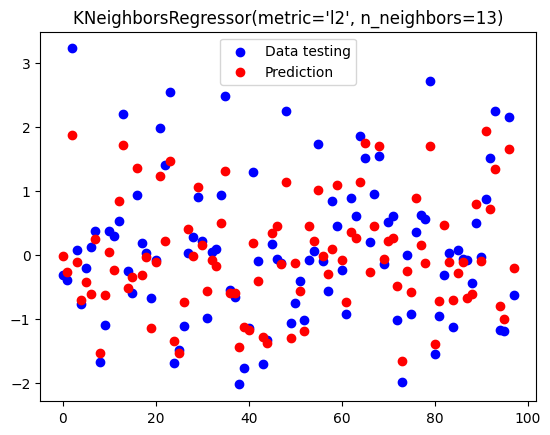


For test size 0.2 and train size 0.8:
Best Parameters: {'algorithm': 'auto', 'metric': 'l2', 'n_neighbors': 7}
Best Cross-Validation Score: 0.7834821617121148
Test Set Metrics:
  R^2 Score: 0.7641
  Mean Squared Error: 0.2363
  Mean Absolute Error: 0.3912


<ipython-input-64-92328bcfdc99>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


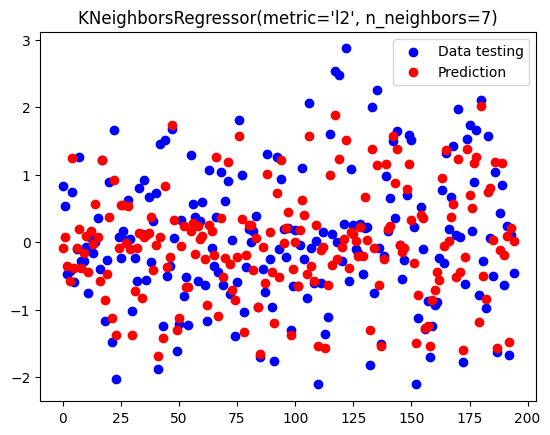


For test size 0.30000000000000004 and train size 0.7:
Best Parameters: {'algorithm': 'auto', 'metric': 'l2', 'n_neighbors': 10}
Best Cross-Validation Score: 0.7947970574701124
Test Set Metrics:
  R^2 Score: 0.7551
  Mean Squared Error: 0.2149
  Mean Absolute Error: 0.3668


<ipython-input-64-92328bcfdc99>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


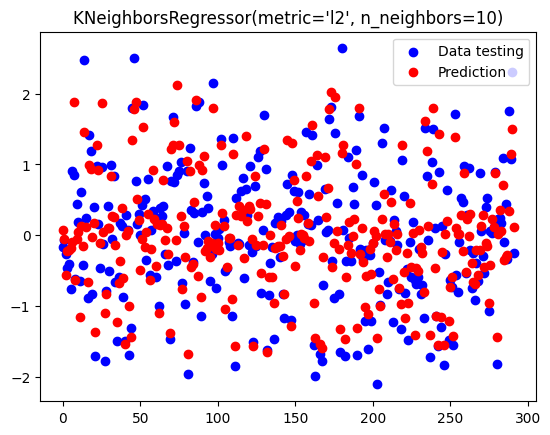


For test size 0.4 and train size 0.6:
Best Parameters: {'algorithm': 'auto', 'metric': 'l2', 'n_neighbors': 9}
Best Cross-Validation Score: 0.7739342907038189
Test Set Metrics:
  R^2 Score: 0.7812
  Mean Squared Error: 0.2186
  Mean Absolute Error: 0.3690


<ipython-input-64-92328bcfdc99>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


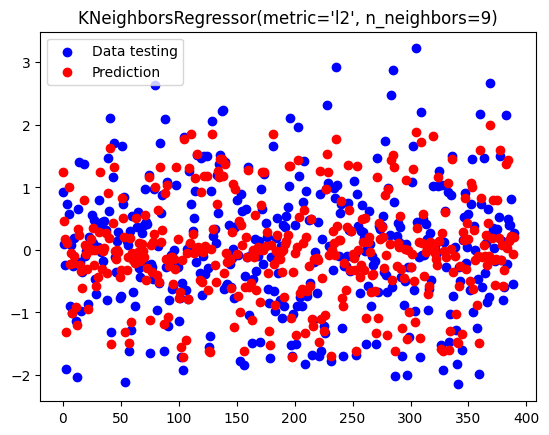


For test size 0.5 and train size 0.5:
Best Parameters: {'algorithm': 'auto', 'metric': 'l2', 'n_neighbors': 8}
Best Cross-Validation Score: 0.786426757895577
Test Set Metrics:
  R^2 Score: 0.7805
  Mean Squared Error: 0.2082
  Mean Absolute Error: 0.3700


<ipython-input-64-92328bcfdc99>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_range = int(max(y_test))


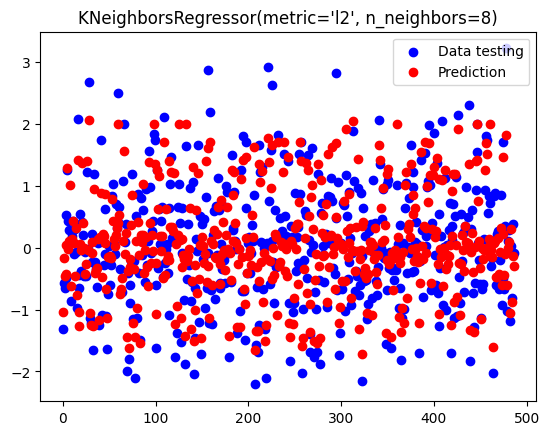

In [73]:
best_model_estimators(
     X_without_fat_percentage_scaler,
     y_scaler,
     clf_knn
 )

In [74]:
param_dec_tree = {
    'criterion' : [ "squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ['best','random'],
    'max_depth' : np.arange(stop = 10 , step =1, start =  1),
    'min_samples_split':np.arange(stop = 10, step =1, start = 2)

}
clf_tree_without_fat_percentage = GridSearchCV(DecisionTreeRegressor(),
                       param_dec_tree,
                       return_train_score=False)


For test size 0.1 and train size 0.9:
Best Parameters: {'criterion': 'poisson', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.8060047198126586
Test Set Metrics:
  R^2 Score: 0.8836
  Mean Squared Error: 10569.0429
  Mean Absolute Error: 81.0222


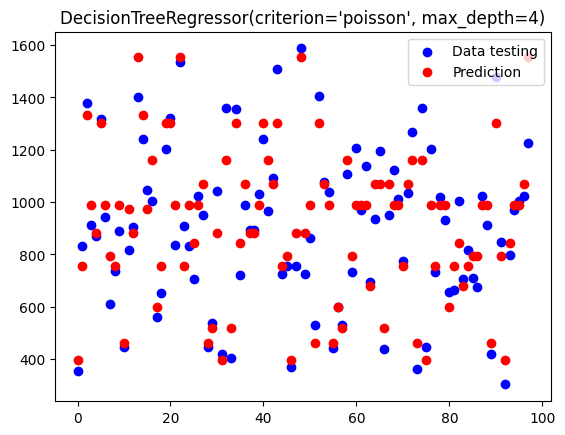


For test size 0.2 and train size 0.8:
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.8083690984203628
Test Set Metrics:
  R^2 Score: 0.8109
  Mean Squared Error: 14153.9679
  Mean Absolute Error: 93.2436


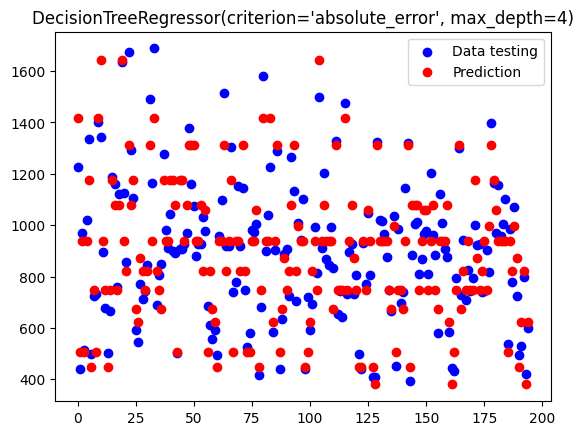


For test size 0.30000000000000004 and train size 0.7:
Best Parameters: {'criterion': 'poisson', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.8163107914638257
Test Set Metrics:
  R^2 Score: 0.8144
  Mean Squared Error: 14239.3087
  Mean Absolute Error: 93.7900


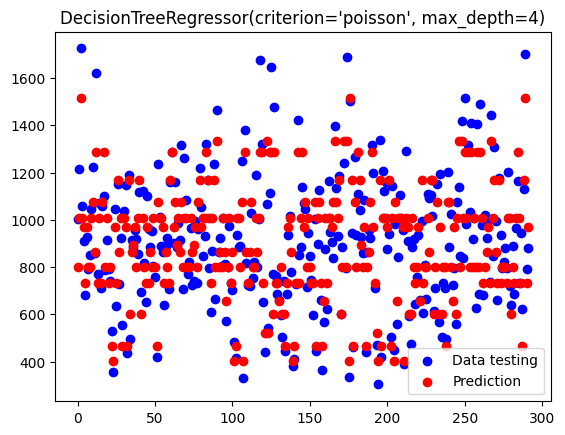


For test size 0.4 and train size 0.6:
Best Parameters: {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.815279677411058
Test Set Metrics:
  R^2 Score: 0.8191
  Mean Squared Error: 12282.0709
  Mean Absolute Error: 87.3830


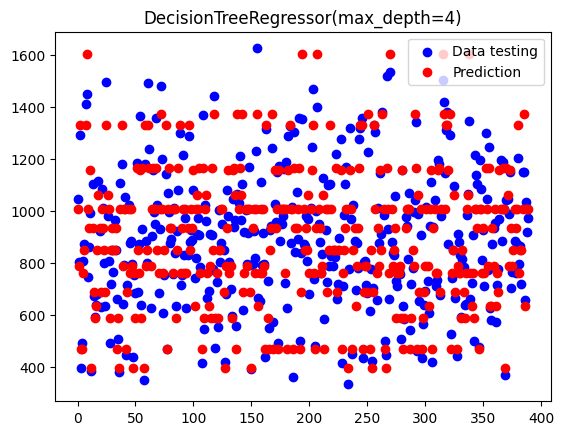


For test size 0.5 and train size 0.5:
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_split': 7, 'splitter': 'random'}
Best Cross-Validation Score: 0.8025803364910977
Test Set Metrics:
  R^2 Score: 0.8109
  Mean Squared Error: 14111.5541
  Mean Absolute Error: 92.3858


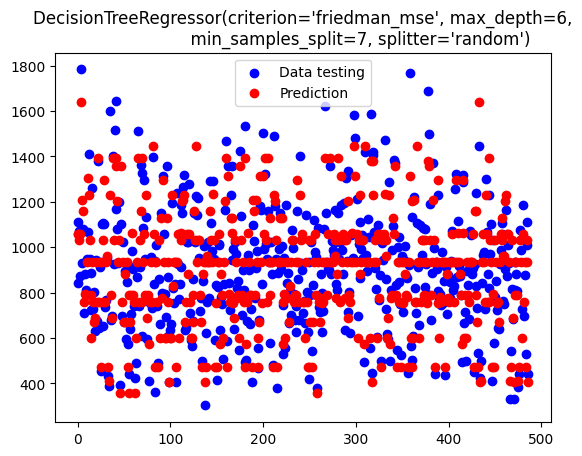

In [68]:
best_model_estimators(
     X_without_fat_percentage,
     y,
     clf_tree_without_fat_percentage
 )

Best model balance no overfitting and underfitting is
Decision tree with train split test, with best params:
  * test size 0.2 and train size 0.8:
  * Best Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
  * Best Cross-Validation Score: 0.8083690984203628
  * Test Set Metrics:
    * R^2 Score: 0.8109
    * Mean Squared Error: 14153.9679
    * Mean Absolute Error: 93.2436




In [76]:
X_train, X_test, y_train, y_test = train_test_split(
          X_without_fat_percentage, y, test_size=0.2, train_size=0.8
      )

In [79]:
tree_regressor = DecisionTreeRegressor(
    criterion = 'absolute_error',
    max_depth = 4,
    min_samples_split = 2,
    splitter = 'best'
)

In [80]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4)

In [82]:
pred_tree_regressor = tree_regressor.predict(X_test)

## Evaluation

In [89]:
def evaluation_regression(data_actual,
                         data_prediction,
                         model):
        r2 = r2_score(data_actual, data_prediction)
        mse = mean_squared_error(data_actual, data_prediction)
        mae = mean_absolute_error(data_actual, data_prediction)

        print(f"Test Set Metrics:")
        print(f"  R^2 Score: {r2:.4f}")
        print(f"  Mean Squared Error: {mse:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        plot_graph(data_actual, data_prediction, model)

Test Set Metrics:
  R^2 Score: 0.8270
  Mean Squared Error: 11466.6397
  Mean Absolute Error: 84.2231


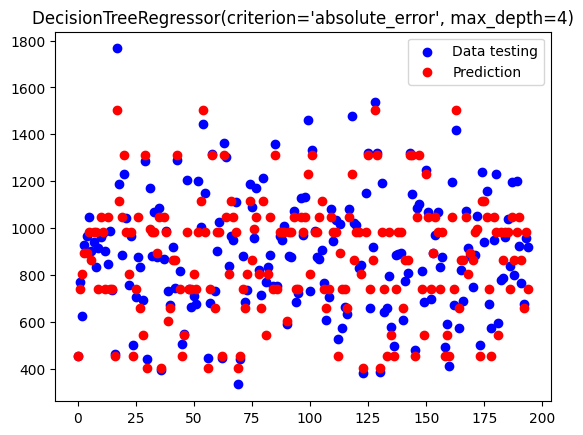

In [90]:
evaluation_regression(y_test, pred_tree_regressor, tree_regressor)

## Save model

In [91]:
import pickle
filename_simple_model = 'model_tree_simple.pkl'
pickle.dump(tree_regressor, open(filename_simple_model, 'wb'))

In [94]:
loaded_model = pickle.load(open(filename_simple_model, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8269621744354245


In [101]:
def encode_type_workout(workout):
  data = {
      0: "Yoga" ,
      1 : "HIIT" ,
      2: "Cardio",
      3:"Strength"
  }
  return data.get(workout)
def calculation_tree(
    Weight,
    Session_Duration,
    Workout_Type,
    Water_Intake,
    Workout_Frequency,
):
    try:

        # Prepare the input data
        input_data = np.array(
            [
                [
                    Weight,
                    Session_Duration,
                    Workout_Type,
                    Water_Intake,
                    Workout_Frequency,
                ]
            ]
        )

        # Make the prediction
        result  = loaded_model.predict(input_data)
        return {
            "status": "success",
            "input": {
                "Weight": Weight,
                "Session_Duration": Session_Duration,
                "Workout_Type": encode_type_workout(Workout_Type),
                "Water_Intake": Water_Intake,
                "Workout_Frequency": Workout_Frequency,
            },
            "hasil": result[0],  # Convert to list for JSON serialization
        }

    except FileNotFoundError as e:
        return {"status": "error", "message": str(e)}

    except Exception as e:
        return {"status": "error", "message": f"An error occurred: {str(e)}"}

In [102]:
calculation_tree(88.3, 1.69, 3, 3.5, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


{'status': 'success',
 'input': {'Weight': 88.3,
  'Session_Duration': 1.69,
  'Workout_Type': 'Strength',
  'Water_Intake': 3.5,
  'Workout_Frequency': 4},
 'hasil': 1313.0}